In [26]:
!jt -l
!jt -t grade3

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [2]:
import os
import sys
import pandas as pd
import numpy as np



In [3]:
def handle_helper_functions():
    sys.path.append('/Users/learn/Desktop/Projects/machine-translation/machine-learning/test/helper')                                       
    sys.path.append('/Users/learn/Desktop/Projects/machine-translation/machine-learning/utils')
    sys.path.append('/Users/learn/Desktop/Projects/machine-translation/machine-learning/data')
    sys.path.append('/Users/learn/Desktop/Projects/machine-translation/machine-learning/visualization')

handle_helper_functions()

In [4]:
from bar_chart import plot_chart_for_all_metrics, plotBarChart

In [5]:
def trim(analytics_table):
    temp= analytics_table['gpt'].values
    result = map(lambda x: x.strip(), temp) 
    new_value= np.array(list(result))
    analytics_table['gpt']=new_value
    return analytics_table

In [60]:
import pandas as pd
import os
files= ["1.csv","2.csv","3.csv","4.csv","5.csv","6.csv",]

analytics_table = pd.concat(map(pd.read_csv, files))

analytics_table =trim(analytics_table=analytics_table)
total_sentences= (analytics_table.count())[0]

In [61]:
acutal = map(lambda x: [x.split()],  analytics_table['eng'].values  ) 
acutal=list(acutal)
acutal[0]



[['a', 'black', 'box', 'in', 'your', 'car']]

In [62]:
predicted_1= ((analytics_table['gpt'].values)[0]).split()
predicted_1= ("a black box in the car").split()
predicted=[predicted_1]
predicted = map(lambda x: x.split(),  analytics_table['gpt'].values  ) 
predicted=list(predicted)
predicted[0]

['You', 'can', 'type', 'a', 'letter', 'in', 'the', 'box', 'below.']

/Users/learn/Desktop/Projects/machine-translation/machine-learning/.env/lib/python3.9/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


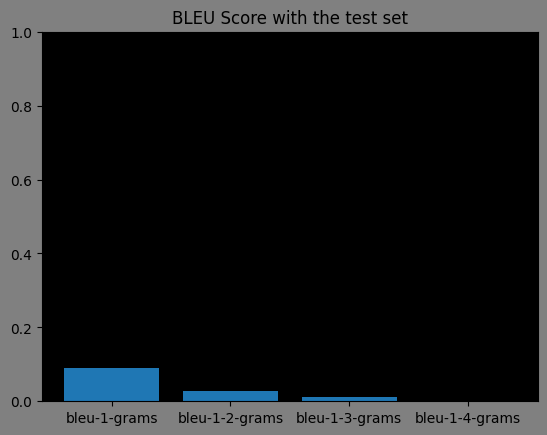

In [63]:

import matplotlib.pyplot as plt
plt.figure(facecolor='grey')

ax = plt.axes()
ax.set_facecolor("black")
from performance_metric import  bleu_score, calculate_ROUGE,get_cosine_val

bleu_test=bleu_score(acutal, predicted)
plt.bar(x = bleu_test.keys(), height = bleu_test.values())
plt.title("BLEU Score with the test set")
plt.ylim((0,1))
plt.show()

In [64]:
analytics_table.count()

Unnamed: 0    780
hindi         780
eng           780
gpt           780
dtype: int64

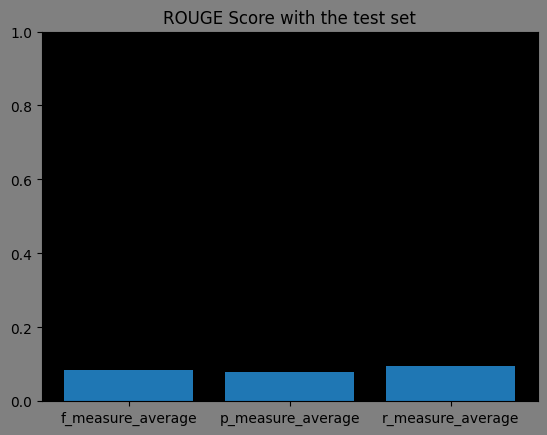

In [65]:
actual_rouge = map(lambda x: x.split(),  analytics_table['eng'].values  ) 
actual_rouge=list(actual_rouge)
actual_rouge[0]
rouge_test = calculate_ROUGE(actual=actual_rouge, predicted=predicted)
rouge_test
plt.figure(facecolor='grey')
ax = plt.axes()
ax.set_facecolor("black")
plt.bar(x = rouge_test.keys(), height = rouge_test.values())
plt.title("ROUGE Score with the test set")
plt.ylim((0,1))
plt.show()

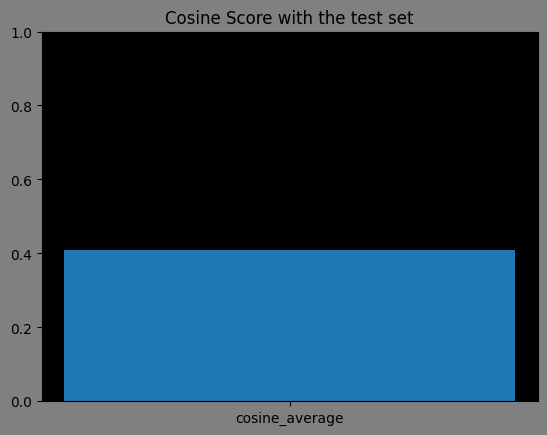

In [66]:
from statistics import mean

translation= (analytics_table['gpt'].values)[0]
raw_target= (analytics_table['eng'].values)[0]
cosine_value_list= []
for reference, candidate in zip(analytics_table['eng'], analytics_table['gpt']):
    cosine_value= get_cosine_val (translation,raw_target )
    cosine_value_list.append(cosine_value)
   
average_cosine= mean(cosine_value_list)

plt.figure(facecolor='grey')
ax = plt.axes()
ax.set_facecolor("black")
plt.bar(x = "cosine_average", height = average_cosine)
plt.title("Cosine Score with the test set")
plt.ylim((0,1))
plt.show()


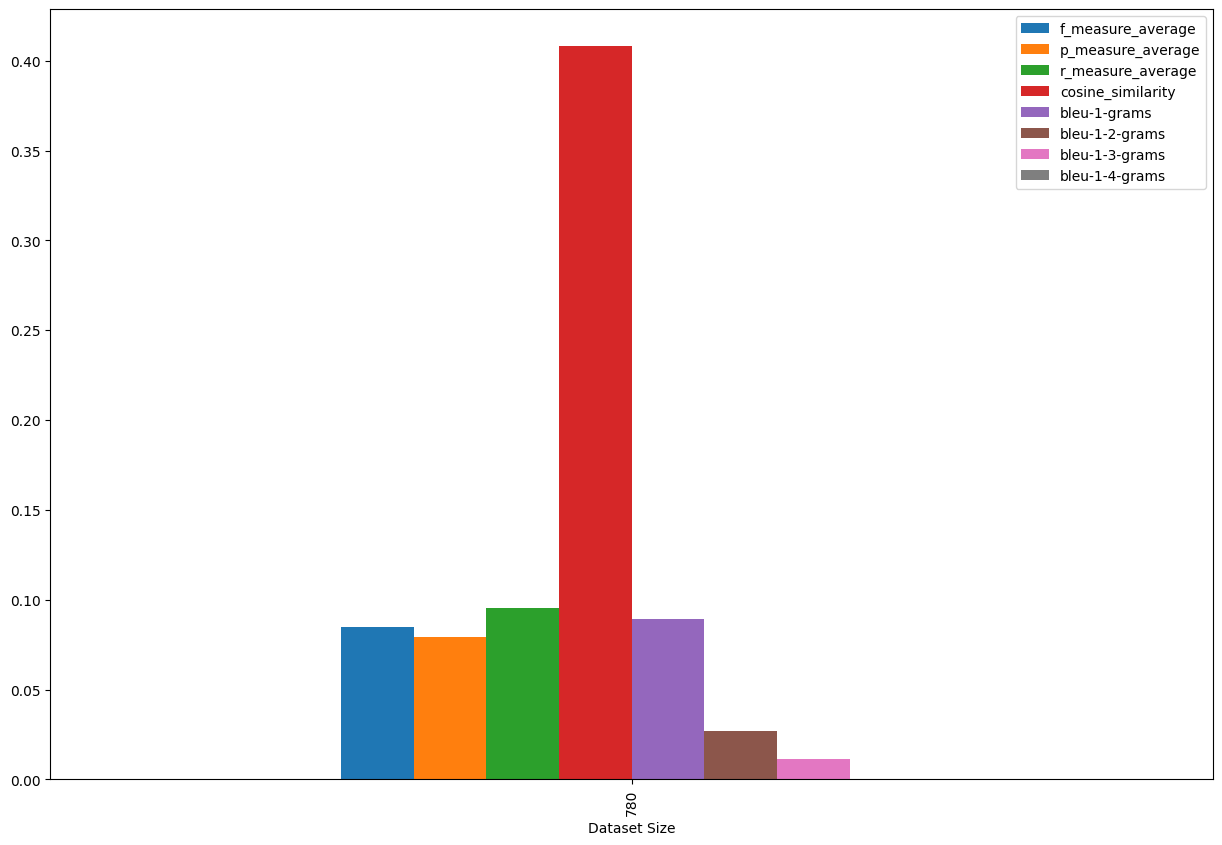

In [80]:
import matplotlib.pyplot as plot
from matplotlib.ticker import ScalarFormatter

#,figsize=(10,15)
keys=["Dataset Size", *rouge_test.keys(), "cosine_similarity", *bleu_test.keys()]
values=[total_sentences,  *rouge_test.values(), average_cosine, *bleu_test.values() ]
table =pd.DataFrame(columns=keys, data=[values])
table.plot.bar(x="Dataset Size",figsize=(15,10))
plot.show(block=True)
